# Prepare fire map for Geer canyon

Ideas:
- first convert geercanyon geotiff as polygon
- use Qgis Raster to clip the fire map for geercanyon
- use the code below to resample the clip fire map as the sampe grid size of geercanyon geotiff
- change the resample grid values: area with no values (15) within the study area is assigned as 2; other areas outside of the study area (0) are assigned as no data value 255

Files in folder:
- CALWOOD_sbs.tif  original fire map coverving area larger than Geercanyon
- SBS legend.jpg  legend for each value in original fire map
- polygon_geercanyon:  polygon file used for clipping the original fire map
- clip_geercanyon:  raster file of the clipped fire map area for geer canyon
- fire_map_geercanyon: final product of the fire map for geer canyon

In [1]:
# resample fire map as geercanyon tiff grid size
import os
import rioxarray
import rasterio as rio
import matplotlib.pyplot as plt

#os.chdir('firemap_geercanyon')
dem = rioxarray.open_rasterio('geer_canyon.tif')
clip_firemap = rioxarray.open_rasterio('clip_geercanyon_ori.tif')
resample = clip_firemap.rio.reproject_match(dem, resampling=rio.enums.Resampling.nearest)

Text(0, 0.5, 'Y')

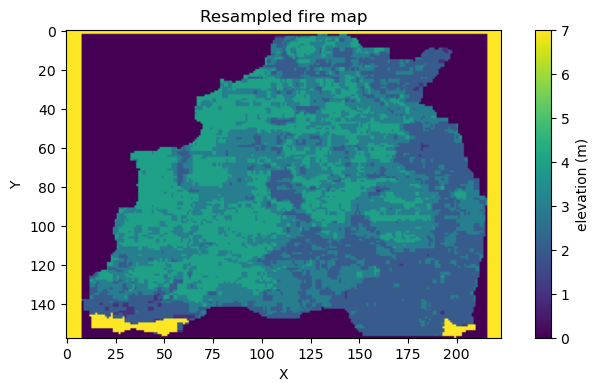

In [2]:
# Plot the raster
plt.figure(figsize=(9, 4))
plt.imshow(resample.data[0], cmap="viridis", vmin=0, vmax=7)
plt.colorbar(label="elevation (m)")
plt.title("Resampled fire map")
plt.xlabel("X")
plt.ylabel("Y")

In [3]:
# assign values for special area
import numpy as np

dem_mask = dem.data[0].copy()
resample_data = resample.data[0].copy()

resample_data = np.where(dem_mask == -9999, 255, resample_data)  # make sure no data value are matching for two maps
resample_data = np.where(resample_data==15, 2, resample_data)
resample_data = np.where(resample_data==0, 255, resample_data)
# resample_data = np.where((dem_mask != -9999) & (resample_data ==255), 2, resample_data)

Text(0, 0.5, 'Y')

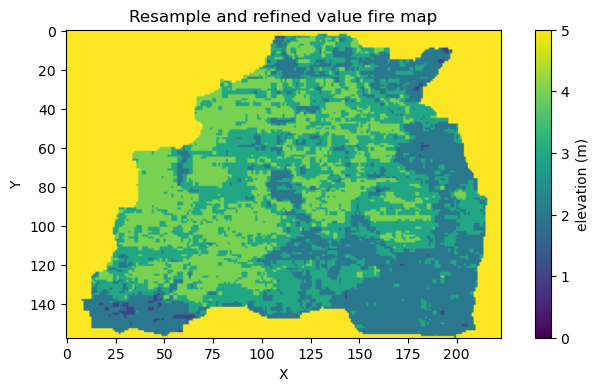

In [4]:
# Plot the raster
plt.figure(figsize=(9, 4))
plt.imshow(resample_data, cmap="viridis", vmin=0, vmax=5)
plt.colorbar(label="elevation (m)")
plt.title("Resample and refined value fire map")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

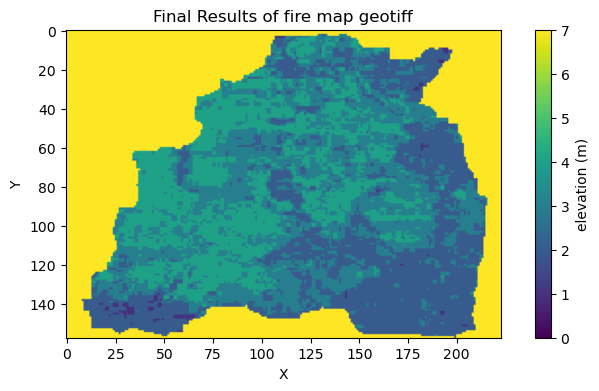

In [5]:
# assign final values to resample raster 
resample.data[0] = resample_data
plt.figure(figsize=(9, 4))
plt.imshow(resample.data[0], cmap="viridis", vmin=0, vmax=7)
plt.colorbar(label="elevation (m)")
plt.title("Final Results of fire map geotiff")
plt.xlabel("X")
plt.ylabel("Y")

In [6]:
# save resample raster as a new geotiff file
resample.rio.to_raster("fire_map_geercanyon.tif")